This is a project practice from this article:         
https://medium.com/analytics-vidhya/how-to-build-a-restaurant-recommendation-engine-part-1-21aadb5dac6e

To Know Different types of recommended engine:   
Go to Recommended Engine Practice 2

In [1]:
import numpy as np 
import pandas as pd 
import re
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

Things I needed to learn from this:          
* re
* init_notebook_mode() && plotly.graph_objs --interactive graphs. See article below.



In [2]:
data=pd.read_csv('data/zomato.csv', encoding ='latin1')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


To Learn:    
* Forms of encoding

In [3]:
country = pd.read_excel("data/Country-Code.xlsx")
country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [4]:
df_restaurant=pd.merge(data, country, on='Country Code')
df_restaurant.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


# Data Exploration

For interactive graphics I looked up on this article:       
https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e         
which explains plotly

Another one is bookeh:  
https://bokeh.pydata.org/en/latest/    

Galleries:    
https://plot.ly/python/     
and seaborn       

To further study:  
https://mode.com/blog/python-interactive-plot-libraries

In [5]:
#pie chart showing countries where the maximum number of restaurants are registered on Zomato
labels = list(df_restaurant.Country.value_counts().index)
values = list(df_restaurant.Country.value_counts().values)
fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}
iplot(fig)

To learn:    
* Fixed layout: have both data and layout
* Understanding all the attributes

In [6]:
#Bokeh Version
from math import pi

from bokeh.io import output_notebook, show
#output_notebook instead output_file to show in jupyter notebook
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum

In [7]:
output_notebook()

Loading BokehJS ...

In [19]:
data={'Country':labels,'values':values}
# data = pd.Series(x).reset_index(name='value').rename(columns={'index':'country'})
data['angle'] = values/sum(values) * 10*pi
data['color'] = Category20c[len(labels)]
print(data)

p = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@Country: @values", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='Country', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

{'Country': ['India', 'United States', 'United Kingdom', 'South Africa', 'UAE', 'Brazil', 'New Zealand', 'Turkey', 'Australia', 'Phillipines', 'Indonesia', 'Singapore', 'Sri Lanka', 'Qatar', 'Canada'], 'values': [8652, 434, 80, 60, 60, 60, 40, 34, 24, 22, 21, 20, 20, 20, 4], 'angle': array([2.84588626e+01, 1.42754812e+00, 2.63142511e-01, 1.97356883e-01,
       1.97356883e-01, 1.97356883e-01, 1.31571256e-01, 1.11835567e-01,
       7.89427533e-02, 7.23641905e-02, 6.90749091e-02, 6.57856278e-02,
       6.57856278e-02, 6.57856278e-02, 1.31571256e-02]), 'color': ['#3182bd', '#6baed6', '#9ecae1', '#c6dbef', '#e6550d', '#fd8d3c', '#fdae6b', '#fdd0a2', '#31a354', '#74c476', '#a1d99b', '#c7e9c0', '#756bb1', '#9e9ac8', '#bcbddc']}


In [21]:
#pie chart showing the top 10 cities where the maximum number of restaurants are registered on Zomato

res_India = df_restaurant[df_restaurant.Country == 'India']
labels1 = list(res_India.City.value_counts().index)
values1 = list(res_India.City.value_counts().values)
labels1 = labels1[:10]
values1 = values1[:10]
fig = {
    "data":[
        {
            "labels" : labels1,
            "values" : values1,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .8]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Cities",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}
iplot(fig)

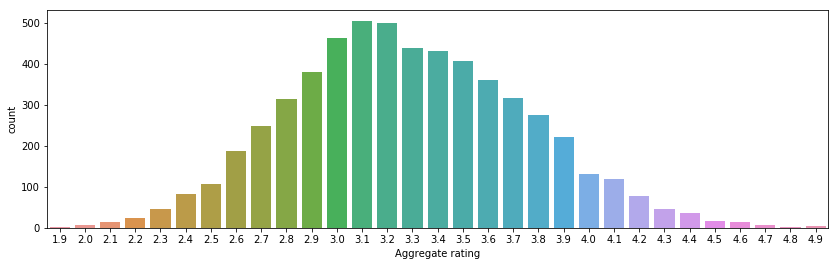

In [57]:
#Average rating in NCR region
NCR = ['New Delhi','Gurgaon','Noida','Faridabad']
res_NCR = res_India[(res_India.City == NCR[0])|(res_India.City == NCR[1])|(res_India.City == NCR[2])|
                    (res_India.City == NCR[3])]
agg_rat = res_NCR[res_NCR['Aggregate rating'] > 0]
f, ax = plt.subplots(1,1, figsize = (14, 4))
ax = sns.countplot(agg_rat['Aggregate rating'])
plt.show()

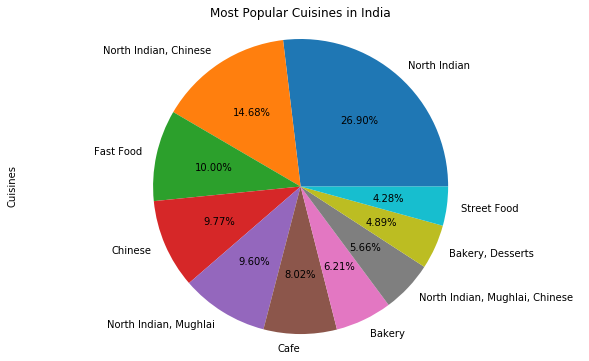

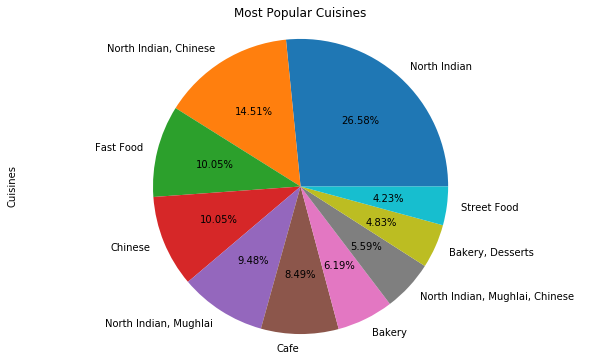

In [70]:
#There was a bit of confusion here whether it is india restaurants or restaurants in data frame
fig = plt.figure(figsize=(20,20))
# ax1 = fig.add_subplot(211)  
res_India['Cuisines'].value_counts().sort_values(ascending=False).head(10)
res_India['Cuisines'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',figsize=(10,6), 
title="Most Popular Cuisines in India", autopct='%1.2f%%')
plt.axis('equal')

fig = plt.figure(figsize=(20,20))
# ax1 = fig.add_subplot(211)  
df_restaurant['Cuisines'].value_counts().sort_values(ascending=False).head(10)
df_restaurant['Cuisines'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',figsize=(10,6), 
title="Most Popular Cuisines", autopct='%1.2f%%')
plt.axis('equal')


plt.subplots_adjust(wspace = 1)
plt.show()

#From the follwong graph, we can deduce there was not much difference

Below is my added data exploration

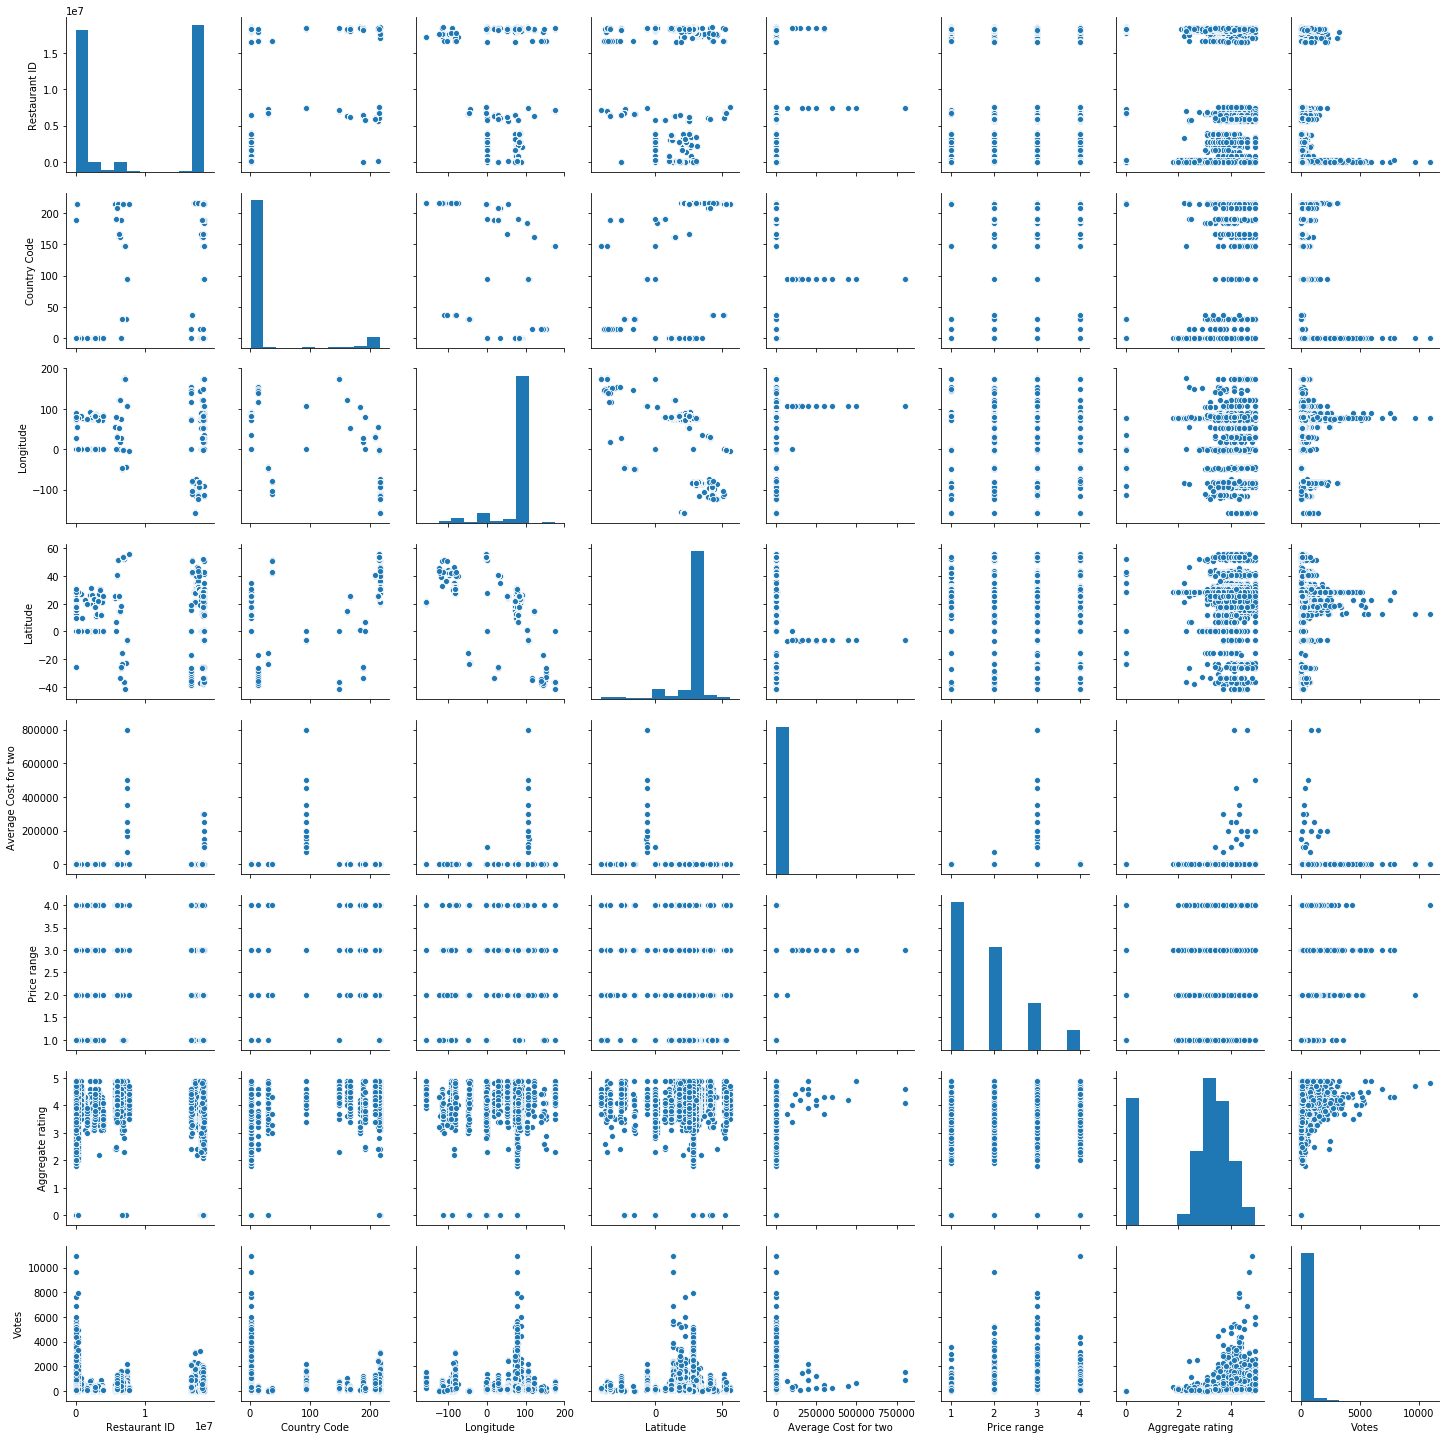

In [71]:
sns.pairplot(df_restaurant)

In [80]:
#Explore data
df_restaurant.columns
# df_restaurant.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [79]:
df_restaurant.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


From data, I would want to know which country has the most restaurants. (Did)         
The Price Range in each Country. (Bar chart) Related to Cuisine and Rating and No of Votes as well.

We need to clean the rating column to just one and use labelEncoder

# Data Filtering

One Downside is the popularity/rating is not consistent with the amount of voters. For one, it does not take into consideration the popularity of a restaurant. Therefore, a restaurant with a rating of 9 from 10 voters will be considered ‘better’ than a restaurant with a rating of 8.9 from 10,000 voters. Hence used a formula to calculate.

In [81]:
data_new_delphi=res_NCR[['Restaurant Name','Cuisines','Locality','Aggregate rating', 'Votes']]

C = data_new_delphi['Aggregate rating'].mean()
print(C)
#2.39583438526

2.395834385256249


In [82]:
m = data_new_delphi['Votes'].quantile(0.90)
print(m)

234.0


In [83]:
# Filter out all qualified restaurants into a new DataFrame
q_restaurant = data_new_delphi.copy().loc[data_new_delphi['Votes'] >= m]
q_restaurant.shape
#(795, 5)

(795, 5)

In [84]:
# Function that computes the weighted rating of each restaurant
def weighted_rating(x, m=m, C=C):
    v = x['Votes']
    R = x['Aggregate rating']
    # Calculating the score
    return (v/(v+m) * R) + (m/(m+v) * C)

# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_restaurant['score'] = q_restaurant.apply(weighted_rating, axis=1)

In [85]:
#Sort restaurant based on score calculated above
q_restaurant = q_restaurant.sort_values('score', ascending=False)
#Print the top 10 restaurants in Delhi NCR
q_restaurant[['Restaurant Name','Cuisines', 'Locality','Votes', 'Aggregate rating', 'score']].head(10)

,Restaurant Name,Cuisines,Locality,Votes,Aggregate rating,score
3013,Naturals Ice Cream,Ice Cream,Connaught Place,2620,4.9,4.694683
3601,Indian Accent - The Manor,Modern Indian,Friends Colony,1934,4.9,4.629716
1839,Prankster,"Modern Indian, North Indian",Sector 29,1478,4.8,4.471393
4638,Big Chill,"Italian, Continental, European, Cafe",Khan Market,4986,4.5,4.405675
6997,Echoes Satyaniketan,"Cafe, Continental, Italian, Mexican, Chinese, ...",Satyaniketan,1563,4.7,4.399958
1464,Manhattan Brewery & Bar Exchange,"Finger Food, American, Continental, North Indi...","Global Foyer Mall, Golf Course Road",2093,4.6,4.378352
6659,The California Boulevard,"American, Asian, European, Seafood",Rajouri Garden,1691,4.6,4.332065
4639,Big Chill,"Italian, Continental, European, Cafe",Khan Market,1569,4.6,4.313935
6317,Cafe Lota,"North Indian, South Indian, Bihari",Pragati Maidan,2213,4.5,4.298784
6144,Gulati,"North Indian, Mughlai",Pandara Road Market,4373,4.4,4.298204


# Build Model

In [86]:
import numpy as np 
import pandas as pd 
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
#load the dataset
data = pd.read_csv('data/zomato.csv', encoding ='latin1')

In [87]:
data['City'].value_counts(dropna = False)

New Delhi                 5473
Gurgaon                   1118
Noida                     1080
Faridabad                  251
Ghaziabad                   25
Amritsar                    21
Guwahati                    21
Bhubaneshwar                21
Ahmedabad                   21
Lucknow                     21
Pune                        20
Vizag                       20
Rio de Janeiro              20
Dubai                       20
Mangalore                   20
Rest of Hawaii              20
Kolkata                     20
Puducherry                  20
Waterloo                    20
Wellington City             20
Edinburgh                   20
Macon                       20
Chennai                     20
Bhopal                      20
Savannah                    20
Indore                      20
Cedar Rapids/Iowa City      20
Allahabad                   20
Gainesville                 20
Sharjah                     20
                          ... 
Vernonia                     1
Yorkton 

In [88]:
#max number of restaurants
data_city =data.loc[data['City'] == 'New Delhi']

In [89]:
data_new_delphi=data_city[['Restaurant Name','Cuisines','Locality','Aggregate rating']]

In [90]:
data_new_delphi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5473 entries, 2560 to 8032
Data columns (total 4 columns):
Restaurant Name     5473 non-null object
Cuisines            5473 non-null object
Locality            5473 non-null object
Aggregate rating    5473 non-null float64
dtypes: float64(1), object(3)
memory usage: 213.8+ KB


In [91]:
#use locality and restaurant name as parameters
data_new_delphi.loc[data['Locality'] == 'Connaught Place']

,Restaurant Name,Cuisines,Locality,Aggregate rating
2999,Amber,"North Indian, Chinese, Mughlai",Connaught Place,2.6
3000,Attitude Kitchen & Bar,"North Indian, Continental, Italian",Connaught Place,2.9
3001,Cafe Coffee Day,Cafe,Connaught Place,3.4
3002,Castle 9,"Finger Food, Continental, North Indian, Chinese",Connaught Place,3.1
3003,Costa Coffee,Cafe,Connaught Place,3.4
3004,Delhi Darbar Dhaba,"North Indian, Chinese",Connaught Place,3.2
3005,Garam Dharam,North Indian,Connaught Place,3.4
3006,Gola Sizzlers,"Chinese, North Indian, Mughlai, Continental",Connaught Place,3.0
3007,Indian Coffee House,Fast Food,Connaught Place,3.3
3008,My Bar Lounge & Restaurant,"North Indian, Chinese, Italian, Continental",Connaught Place,2.7


TF-IDF is the statistical method of evaluating the significance of a word in a given document.       
TF — Term frequency(tf) refers to how many times a given term appears in a document.        
IDF — Inverse document frequency(idf) measures the weight of the word in the document, i.e if the word is common or rare in the entire document.          
The TF-IDF intuition follows that the terms that appear frequently in a document are less important than terms that rarely appear.          

use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate (especially when used in conjunction with TF-IDF scores)

Steps to follow :
1. Data consist of the only location
2. Reset index for cosine similarity because the Cosine similarity index has to be same value with the result of TF-IDF vectorizer 
3. Feature Extraction
4. Applying TF-IDF Vectorizer
5. Compute Cosine Similarity
6. Aggregate rating added with cosine score in a list
7. Sort the restaurant names based on the Cosine similarity scores

In [98]:
data_sample=[]
def restaurant_recommend_func(location,title):   
    global data_sample       
    global cosine_sim
    global sim_scores
    global tfidf_matrix
    global corpus_index
    global feature
    global rest_indices
    global idx
    
    # When location comes from function ,our new data consist only location dataset
    data_sample = data_new_delphi.loc[data_new_delphi['Locality'] == location]  
    
    # index will be reset for cosine similarty index because Cosine similarty index has to be same value with result of tf-idf vectorize
    data_sample.reset_index(level=0, inplace=True) 
    
    #Feature Extraction
    data_sample['Split']="X"
    for i in range(0,data_sample.index[-1]):
        split_data=re.split(r'[,]', data_sample['Cuisines'][i])
        for k,l in enumerate(split_data):
            split_data[k]=(split_data[k].replace(" ", ""))
        split_data=' '.join(split_data[:])
        data_sample['Split'].iloc[i]=split_data
        
    #TF-IDF vectorizer
    #Extracting Stopword
    tfidf = TfidfVectorizer(stop_words='english')
    
#Replace NaN for empty string
    data_sample['Split'] = data_sample['Split'].fillna('')
#Applying TF-IDF Vectorizer
    tfidf_matrix = tfidf.fit_transform(data_sample['Split'])
    tfidf_matrix.shape
    
    # Using for see Cosine Similarty scores
    feature= tfidf.get_feature_names()
    
#Cosine Similarity
    # Compute the cosine similarity matrix
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix) 
    
    # Column names are using for index
    corpus_index=[n for n in data_sample['Split']]
       
    #Construct a reverse map of indices    
    indices = pd.Series(data_sample.index, index=data_sample['Restaurant Name']).drop_duplicates() 
    
    #index of the restaurant matchs the cuisines
    idx = indices[title]
    
#Aggregate rating added with cosine score in sim_score list.
    sim_scores=[]
    for i,j in enumerate(cosine_sim[idx]):
        k=data_sample['Aggregate rating'].iloc[i]
        if j != 0 :
            sim_scores.append((i,j,k))
            
    #Sort the restaurant names based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: (x[1],x[2]) , reverse=True)

# 10 similar cuisines
    sim_scores = sim_scores[0:10]
    rest_indices = [i[0] for i in sim_scores] 
  
    data_x =data_sample[['Restaurant Name','Aggregate rating']].iloc[rest_indices]
    
    data_x['Cosine Similarity']=0
    for i,j in enumerate(sim_scores):
        data_x['Cosine Similarity'].iloc[i]=round(sim_scores[i][1],2)
   
    return data_x


In [99]:
# Top 10 similar restaurant with cuisine of 'Pizza Hut' restaurant in Connaught Place
restaurant_recommend_func('Connaught Place','Pizza Hut')

C:\Users\Xin\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Xin\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Xin\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Restaurant Name,Aggregate rating,Cosine Similarity
63,Pizza Hut,3.5,1.00
32,Domino's Pizza,3.7,0.90
91,Ovenstory Pizza,0.0,0.90
70,Sbarro,3.5,0.86
26,Caffe Tonino,3.9,0.68
83,The Rolling Joint,3.9,0.52
8,Indian Coffee House,3.3,0.52
58,Nizam's Kathi Kabab,3.8,0.45
82,The Luggage Room Kitchen And Bar,3.5,0.36
49,Life Caffe,3.6,0.36


To Learn:   
All the code above